### Exploration of Toronto Cyclist Collision Dataset
- http://data.torontopolice.on.ca/datasets/55d5b9f7af7d4710bc98743b2c005f02_0
- downloaded raw data July 13, 2019

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
%matplotlib inline

In [180]:
cnx = sqlite3.connect('cyclist.db')
df = pd.read_sql_query("SELECT * FROM raw_07_2019", cnx)

In [181]:
df = df.drop_duplicates(subset=['ACCNUM'])

In [182]:
df.loc[df[(df['ACCLASS']=='Fatal') & (df['INJURY'] == ' ')].index,'INJURY'] = 'Fatal'

In [183]:
df = df[df['INJURY'] != ' ']

In [184]:
df['DATE']=pd.to_datetime(df['DATE'])

In [185]:
df['MONTH'] = df['DATE'].dt.month

In [186]:
df['DAYOFWEEK'] = df['DATE'].dt.dayofweek

In [187]:
df = df.replace(r'^\s*$', np.nan, regex=True)

In [189]:
df = df.dropna(axis=1, how='all')

In [190]:
len(df)

492

In [105]:
df['ACCLASS'].value_counts()

Non-Fatal Injury    462
Fatal                30
Name: ACCLASS, dtype: int64

In [106]:
df['INJURY'].value_counts()

None       348
Major      113
Fatal       17
Minimal      8
Minor        6
Name: INJURY, dtype: int64

In [107]:
df['IMPACTYPE'].value_counts()

Cyclist Collisions       468
Pedestrian Collisions      9
Turning Movement           5
Sideswipe                  3
SMV Other                  3
Rear End                   2
Other                      1
Angle                      1
Name: IMPACTYPE, dtype: int64

Text(0.5,1,'Total Collisions per Year')

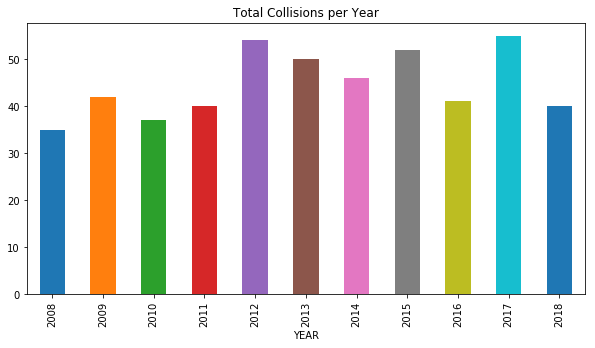

In [116]:
plt.figure(figsize=(10,5))
plt.title('Total Collisions per Year')
df.groupby(['YEAR'])['INJURY'].count().plot(kind='bar')

Text(0.5,1,'Total Collisions per Hour of Day (24h)')

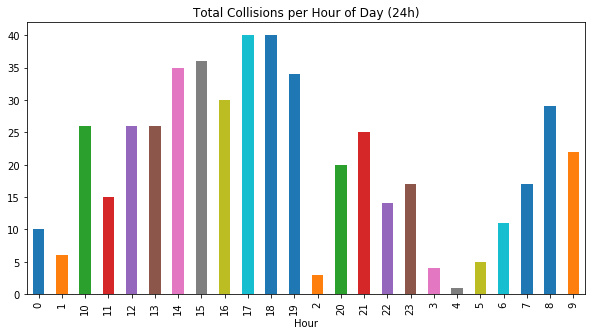

In [143]:
plt.figure(figsize=(10,5))
plt.title('Total Collisions per Hour of Day (24h)')
df.groupby(['Hour'])['INJURY'].count().plot(kind='bar')

Text(0.5,1,'Total Collisions per Month')

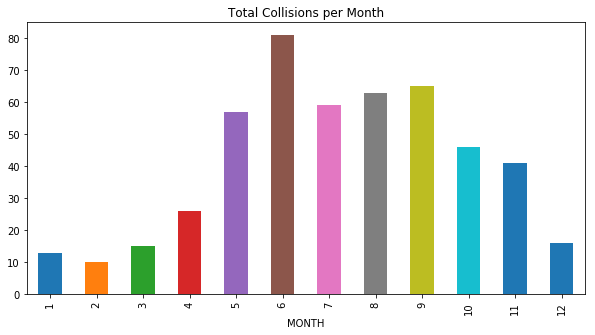

In [133]:
plt.figure(figsize=(10,5))
plt.title('Total Collisions per Month')
df.groupby(['MONTH'])['INJURY'].count().plot(kind='bar')

Text(0.5,1,'Total Collisions per Day of Week - Sunday is Day 6')

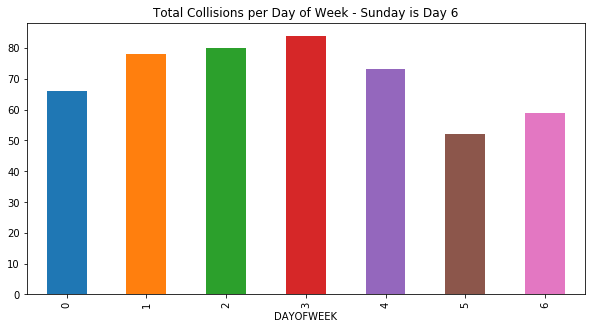

In [142]:
plt.figure(figsize=(10,5))
plt.title('Total Collisions per Day of Week - Sunday is Day 6')
df.groupby(['DAYOFWEEK'])['INJURY'].count().plot(kind='bar')